# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
## Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

#city_data_df.head(10)
#ride_data_df.head(10)


### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [4]:
# ##RND--- this to be done before merging 

# # Get the columns and the rows that are not null.
# city_data_df.count()

# # Get the columns and the rows that are not null.
# city_data_df.isnull().sum()

# # Get the data types of each column.
# city_data_df.dtypes

# # Get the unique values of the type of city.
# city_data_df["type"].unique()

# #data points for the each city_data
# sum(city_data_df["type"]=="Urban")
# sum(city_data_df["type"]=="Suburban")
# sum(city_data_df["type"]=="Rural")


# # Get the columns and the rows that are not null.
# ride_data_df.count()

# # Get the columns and the rows that are not null.
# ride_data_df.isnull().sum()

# # Get the data types of each column.
# ride_data_df.dtypes




## Deliverable 1: Get a Summary DataFrame 

In [5]:
##  1. Get the total rides for each city type

ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]

ride_count



type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
## 2. Get the total drivers for each city type

driver_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]

driver_count.head()


type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type

fare_count = pyber_data_df.groupby(["type"]).sum()["fare"]

fare_count.head()


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type. 

average_fare_per_ride = fare_count/ride_count

average_fare_per_ride.head()


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type.

average_fare_per_driver = fare_count/driver_count

average_fare_per_driver.head()

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame({
            "Total Rides": ride_count, 
            "Total Drivers": driver_count, 
            "Total Fares": fare_count,
            "Average Fare per Ride": average_fare_per_ride, 
            "Average Fare per Driver": average_fare_per_driver
        })

pyber_summary_df.head()


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [12]:
#  8. Format the columns.

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)

pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each  wdatehere the indices are the city type and date.

fare_count_df = pyber_data_df.groupby(['type','date']).sum().fare.to_frame()

fare_count_df

fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26
...                      ...
Urban 5/8/2019 1:54    32.69
      5/8/2019 2:31    41.33
      5/8/2019 4:20    21.99
      5/8/2019 4:39    18.45
      5/8/2019 7:29    18.55

[2364 rows x 1 columns]

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

fare_count_df = fare_count_df.reset_index()
fare_count_df.head()

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26


In [23]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

# fare_count_df = fare_count_df.pivot(index='date',columns='type', values='fare')
# fare_count_df

fare_count_df = pd.pivot_table(pyber_data_df, 
                   values="fare", 
                   index="date",
                   columns="type")

In [24]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

type(fare_count_df.index)

fare_count_df.index = pd.to_datetime(fare_count_df.index)
fare_count_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [25]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

# fare_dates_df =fare_count_df.loc['2019-01-01']
fare_dates_df = fare_count_df.loc['2019-01-01':'2019-04-29']
fare_dates_df


<ipython-input-25-4d763d4a0641>:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  fare_dates_df = fare_count_df.loc['2019-01-01':'2019-04-29']


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-09 20:55:00,NaN,NaN,24.99
2019-04-09 21:41:00,NaN,NaN,15.96
2019-04-09 08:10:00,NaN,NaN,39.36


In [26]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_dates_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [27]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_dates_df = fare_dates_df.resample('W').sum()
fare_dates_df


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.600,1661.680
2019-01-13,67.65,1070.825,2050.430
2019-01-20,306.00,1218.200,1939.020
2019-01-27,179.69,1203.280,2098.470
2019-02-03,333.08,1042.790,2070.490
2019-02-10,115.80,974.340,2162.640
2019-02-17,95.82,1045.500,2235.070
2019-02-24,419.06,1412.740,2466.290
2019-03-03,175.14,858.460,2218.200


Text(0.5, 1.0, 'Total Fare by City Type')

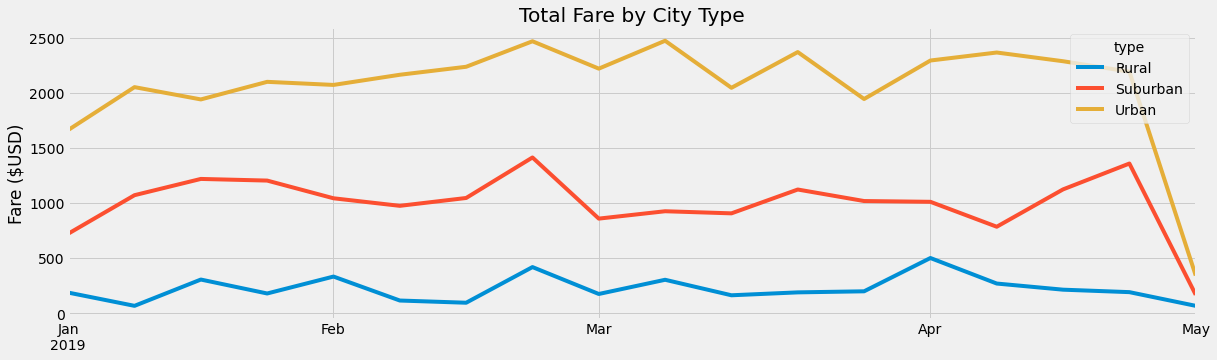

In [28]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fare_dates_df.plot(figsize=(18,5),)
plt.xlabel('')
plt.ylabel('Fare ($USD)')
plt.title('Total Fare by City Type')
#plt.savefig('analysis/Pyber_fare_summary.png');

